# Supplementary notebook for "Breathing K-means" 
(under Review, preprint: https://arxiv.org/abs/2006.15666)

In this jupyter notebook 
* core examples from the paper can be replicated (figure 1, 4b and 5)
* selected other datasets can be used for experiments (with and without known optimum)
* own data sets can be imported from **csv files** to compare k-means++ and breathing k-means 
* own data sets can be created on the fly as **numpy arrays** and used to test the algorithm

## suggested usage
* initially run the complete notebook ("Run all Cells") to regenerate all figures
* then repeat any simulation by executing the respective cell. Since no random seed given, the results will vary due to different initializations
* the reproduced figure can be found by searching for "Reproducing" in the notebook (level 1 headings)
* at the end the notebook one can find examples how to create own data on the fly or read in from csv files

## algorithm implementation
The breathing k-means algorithm is implemented as Python class "BKMeans" in src/bkm.py. The interface is a subset of the KMeans class form scikit-learn

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
import os
import numpy as np
from sklearn.cluster import KMeans # KMeans class from scikit-lean
import matplotlib.pyplot as plt
from time import time

module_path = os.path.abspath(os.path.join('..','src'))
data_path = os.path.abspath(os.path.join('..','data'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# reference implementation of breathing k-means
from bkm import BKMeans 
# different run functions for data from files (some with known optimum), arrays or ad hoc gaussian mixtures
from runfunctions import run_on_stored_dataset_with_opt
from runfunctions import run_on_stored_dataset_with_opt2
from runfunctions import run_on_csv_file
from runfunctions import run_on_array
from runfunctions import run_on_gaussian_mixture

plt.rcParams['font.size']=12

# Basic Usage Example

## Create data set X

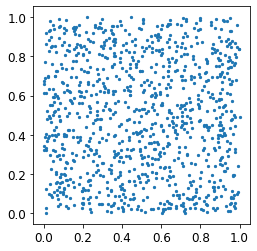

In [3]:
X = np.random.random((1000,2))
#X=np.random.random((150,2))
plt.scatter(x=X[:,1], y=X[:,0],s=5)
plt.gca().set_aspect(1.)

## Running breathing *k*-means
(API is designed to be compatible to scikit-learn)

In [4]:
# create breathing k-means instance
bkm=BKMeans(n_clusters=30)
# run the algorithm on data set X
bkm.fit(X)
# print out results
print("SSE=", bkm.inertia_)
print("Codebook (2 of 30 vectors):\n", bkm.cluster_centers_[:2])

SSE= 4.861349221593783
Codebook (2 of 30 vectors):
 [[0.43411558 0.90244787]
 [0.53564705 0.05663374]]


## Running *k*-means++ (from scikit-learn) on same data set
only shown to illustrate the similarity of the API. Note the higher SSE, though.

In [5]:
# create k-means instance (actually k-means++ since this is the default)
km=KMeans(n_clusters=30)
# run the algorithm on data set X
km.fit(X)
# print out results
print("SSE=", km.inertia_, f"({km.inertia_/bkm.inertia_-1:.2%} higher)")
print("Codebook (2 of 30 vectors):\n", km.cluster_centers_[:2])

SSE= 4.977885995714057 (2.40% higher)
Codebook (2 of 30 vectors):
 [[0.52800602 0.07960931]
 [0.58142763 0.86684564]]


# Organization of the rest of this notebook
In the rest of the notebook we do not explicitely call the API but - for brevity -  the wrapper functions "run_on_*" which do the following (see file runfunctions.py)
* load a specific data set (or take it as parameter)
* run k-means++ and breathing k-means on this data set
* print out SSE values and possibly improvements or deltas from optimum
* print out CPU time overhead of breathing k-means (negative values mean time savings)
* generate a 3-part figure with the data set, the k-means++ result, and the breathing k-means result

# Reproducing Figure 1 (same data set as in paper)
(without the special markup for "misplaced" centroids  

k-means++ ...            SSE=6.622                 t=  1.32s 
breathing k-means ...    SSE=6.149 ( 7.15% lower)  t=  1.23s (-6.86% overhead)


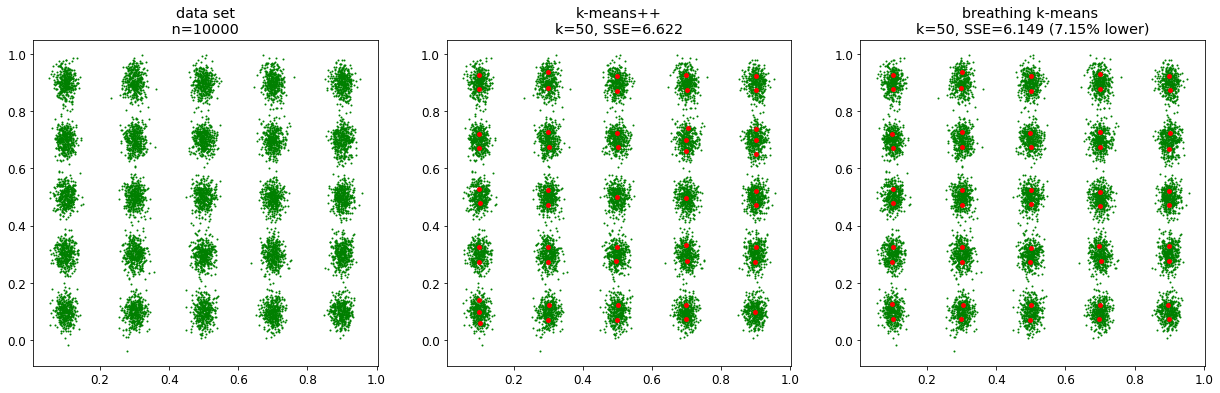

In [6]:
run_on_csv_file("fig1_dat.csv",k=50)

## Variant with k=75
In all observed experiments breathing k-means positioned the optimal number of three centroids in each cluster (although their local positions within their respective cluster are not necessarily optimal)

k-means++ ...            SSE=4.470                 t=  2.87s 
breathing k-means ...    SSE=4.339 ( 2.94% lower)  t=  2.23s (-22.03% overhead)


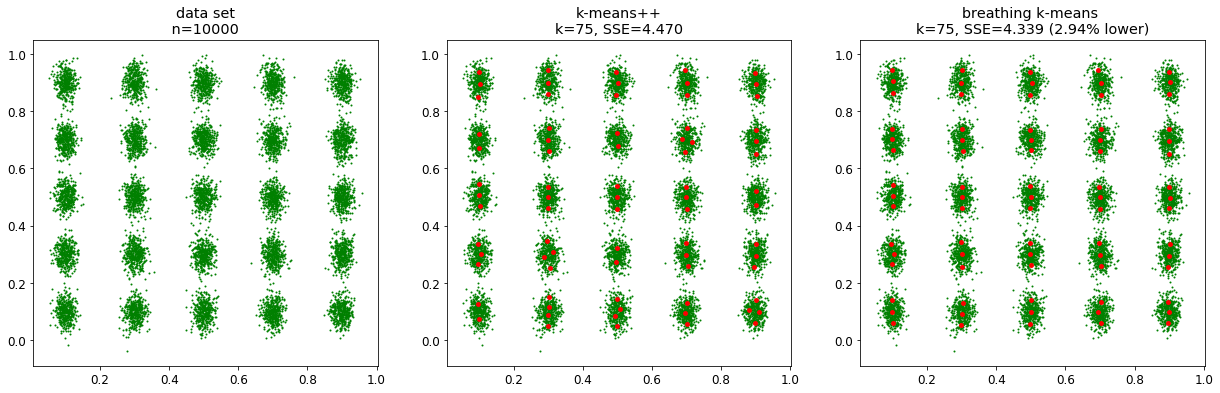

In [7]:
run_on_csv_file("fig1_dat.csv",k=75)

# Approximately Reproducing Figure 4b (positions of clusters are different)

k-means++ ...            SSE=0.887                 t=  1.71s 
breathing k-means ...    SSE=0.873 ( 1.56% lower)  t=  1.94s (13.91% overhead)


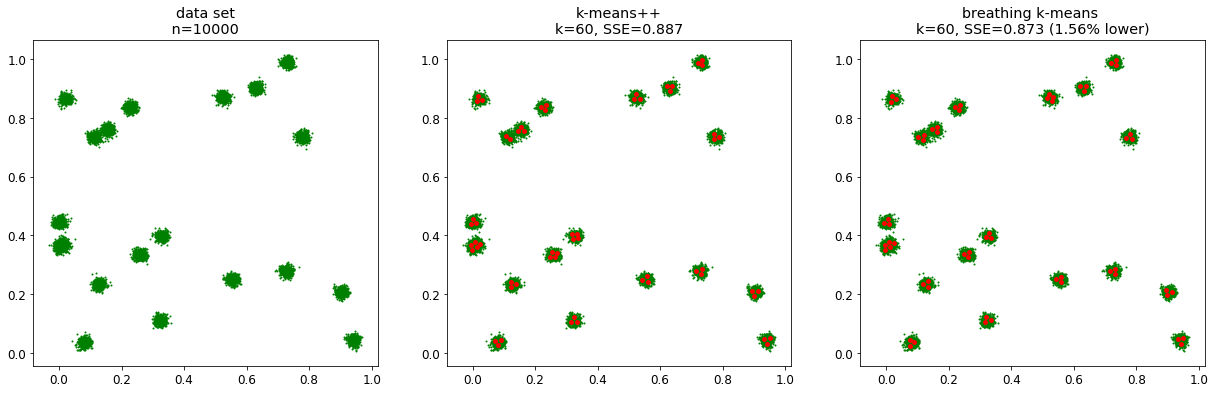

In [8]:
run_on_gaussian_mixture(g=20, k=60, sig=0.01, n=10000)

## computing mean improvement for a specific combination of g and k
similar to figure 4a but with different data set for each run  
(g = number of clusters, k = number of centroids)

In [9]:
def compute_mean_imp(g=20,k=60,dotext=1):
    e_km=[]
    e_bkm=[]
    for i in range(10):
        X,km,bkm=run_on_gaussian_mixture(g=g, k=k, sig=0.01, n=10000, doplot=0,dotext=dotext,retval=1)
        e_km.append(km.inertia_)
        e_bkm.append(bkm.inertia_)
    e_km_mean=np.array(e_km).mean()
    e_bkm_mean=np.array(e_bkm).mean()
    if dotext:
        print(f"\nmean k-means SSE:           {e_km_mean:.4f} \nmean breathing k-means SSE: {e_bkm_mean:.4f} " +
              f"\nmean improvement:           {1-e_bkm_mean/e_km_mean:.2%}")

In [10]:
compute_mean_imp(g=20,k=60)     

k-means++ ...            SSE=0.893                 t=  1.81s 
breathing k-means ...    SSE=0.868 ( 2.82% lower)  t=  2.00s (10.78% overhead)
k-means++ ...            SSE=0.841                 t=  1.94s 
breathing k-means ...    SSE=0.837 ( 0.40% lower)  t=  1.64s (-15.75% overhead)
k-means++ ...            SSE=0.916                 t=  1.74s 
breathing k-means ...    SSE=0.887 ( 3.16% lower)  t=  1.88s ( 8.16% overhead)
k-means++ ...            SSE=0.908                 t=  1.77s 
breathing k-means ...    SSE=0.880 ( 3.12% lower)  t=  1.69s (-4.84% overhead)
k-means++ ...            SSE=0.875                 t=  1.72s 
breathing k-means ...    SSE=0.849 ( 2.91% lower)  t=  2.35s (36.74% overhead)
k-means++ ...            SSE=0.914                 t=  1.79s 
breathing k-means ...    SSE=0.888 ( 2.87% lower)  t=  2.20s (22.98% overhead)
k-means++ ...            SSE=0.925                 t=  1.83s 
breathing k-means ...    SSE=0.883 ( 4.54% lower)  t=  1.99s ( 8.36% overhead)
k-means++ ..

# Gaussian mixture examples

## broad Gaussians (sig=0.03)

k-means++ ...            SSE=7.973                 t=  3.12s 
breathing k-means ...    SSE=7.898 ( 0.94% lower)  t=  2.80s (-10.09% overhead)


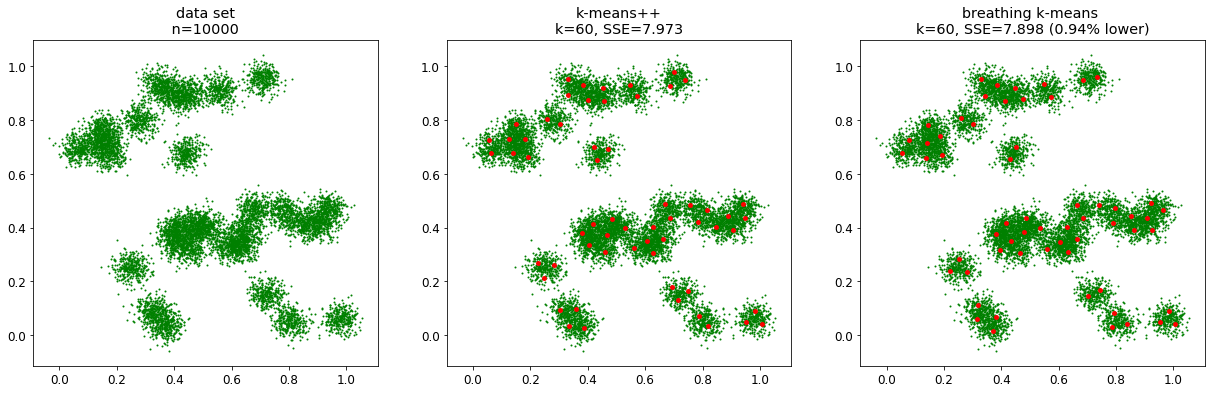

In [11]:
run_on_gaussian_mixture(g=30,k=60,sig=0.03, n=10000) 

## very broad Gaussians (sig=0.05), few data points (200)

k-means++ ...            SSE=0.495                 t=  0.09s 
breathing k-means ...    SSE=0.472 ( 4.62% lower)  t=  0.06s (-32.65% overhead)


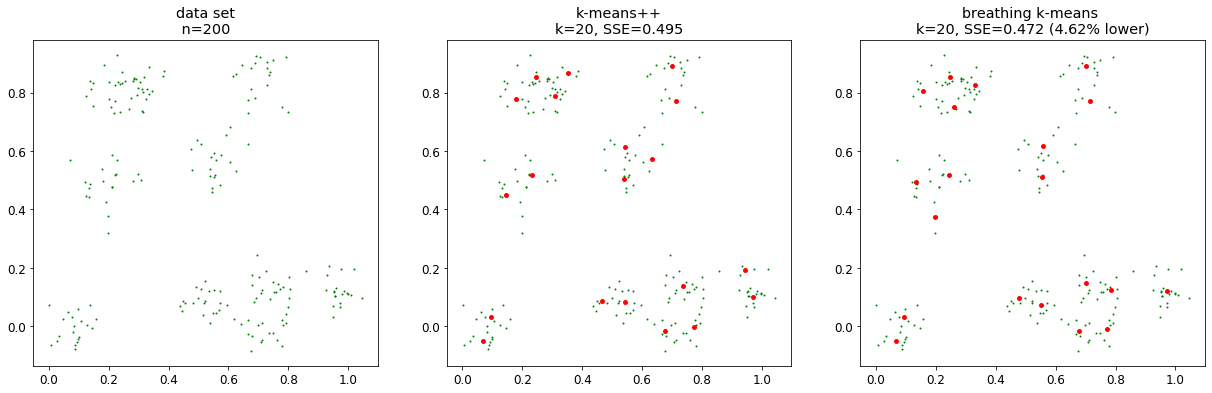

In [12]:
run_on_gaussian_mixture(g=10,k=20,sig=0.05,n=200) 

##  g = k = 20 : easy for k-means++
in this case the solutions found by k-means++ are usually very good (typically placing one centroid in each cluster) and accordingly leave nearly no room for improvement.


k-means++ ...            SSE=1.971                 t=  0.35s 
breathing k-means ...    SSE=1.971 ( 0.00% lower)  t=  0.58s (64.95% overhead)


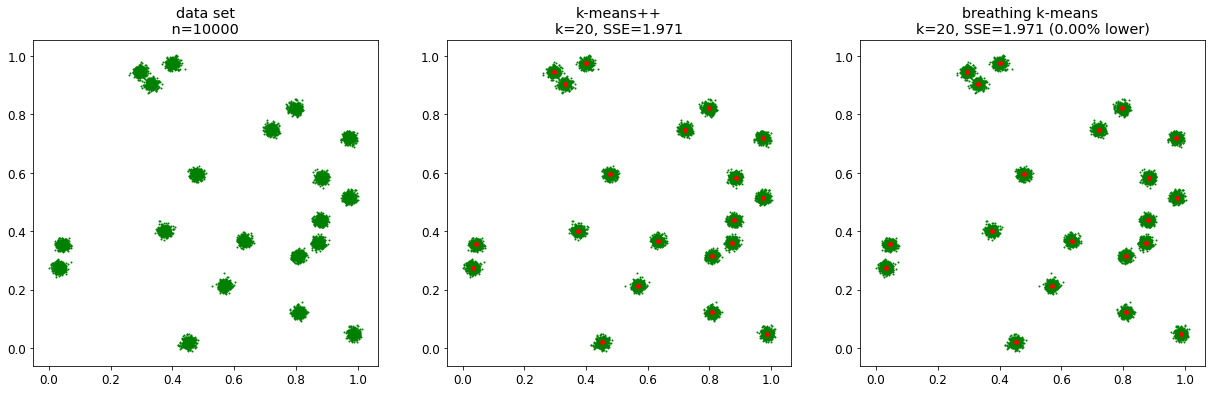

In [13]:
run_on_gaussian_mixture(g=20,k=20,sig=0.01,n=10000)

## n=k=100, more difficult for k-means++
Since clusters are likely to overlap here, the optimum ist not neccessarily one centroid per cluster and is generally harder to find. Breathing k-means often finds an improvement.

k-means++ ...            SSE=2.021                 t=  2.05s 
breathing k-means ...    SSE=1.942 ( 3.91% lower)  t=  2.01s (-2.05% overhead)


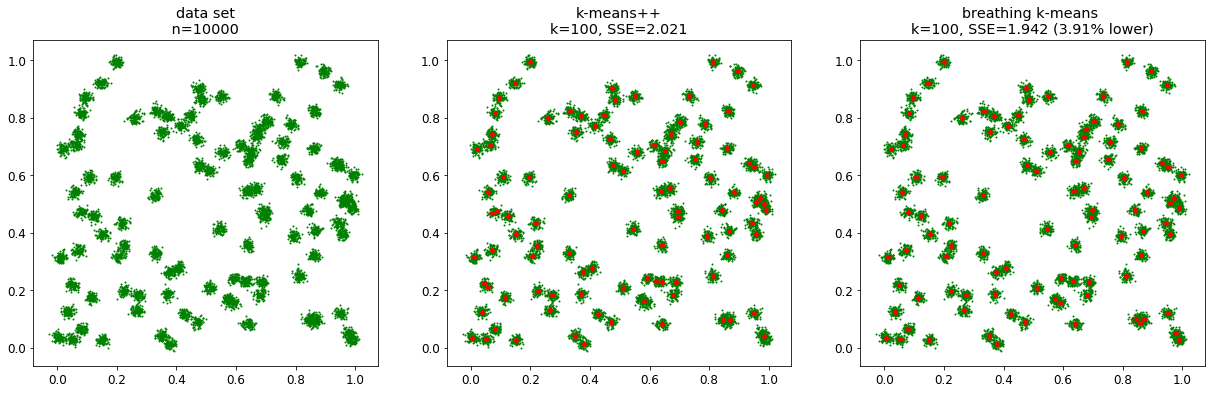

In [14]:
run_on_gaussian_mixture(g=100, k=100, sig=0.01,n=10000)

# Reproducing Figure 5

## Note! Due to an issue with double/float precision the k-means++ results for this example are slightly better than in the paper.

Paper: k-means++ 25.3% from Optimum  
Here: k-means++ about 17-18% from Optimum  

Breathing k-means is unaffected (about 0-5% from optimum) and still better by a very large margin.

Optimum:                 SSE=0.179
k-means++ ...            SSE=0.214=Opt+19.24%, t=  0.63s 
breathing k-means ...    SSE=0.185=Opt+ 3.29%, t=  0.22s  (-64.36% overhead)


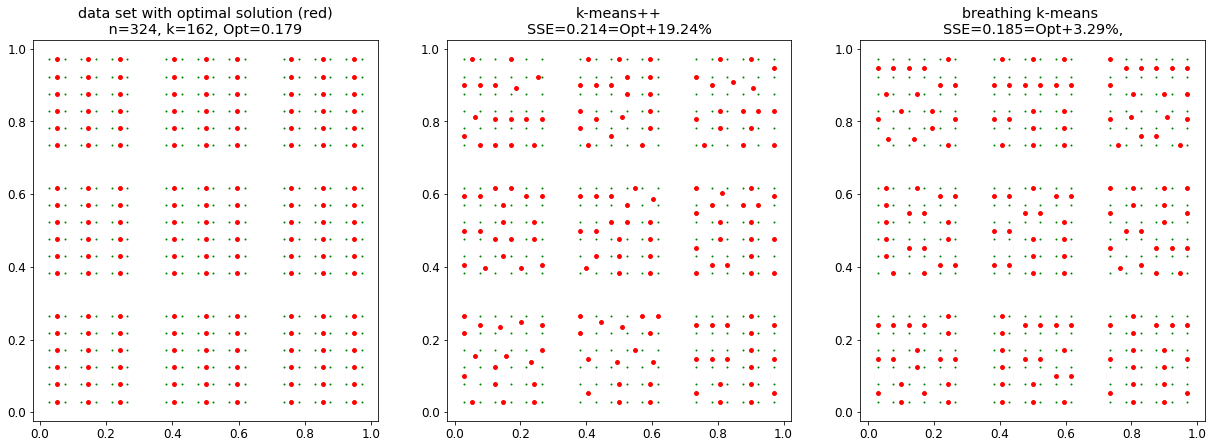

In [15]:
run_on_stored_dataset_with_opt2(prefix="fig5")

## variation of figure 5: k=81
optimum is obtained when each centroid clusters 4 points in a square (SSE=0.359)   
Note: we did not construct an optimum in this case so the problems is displayed as any problem without known optimal solution and only relative improvement is reported.    
If one repeats the calculation (Ctrl+Shift) on this problem a few times, on can not that mostly (not always) the optimal solution is found by breathing k-means.


k-means++ ...            SSE=0.424                 t=  0.36s 
breathing k-means ...    SSE=0.359 (15.33% lower)  t=  0.19s (-47.79% overhead)


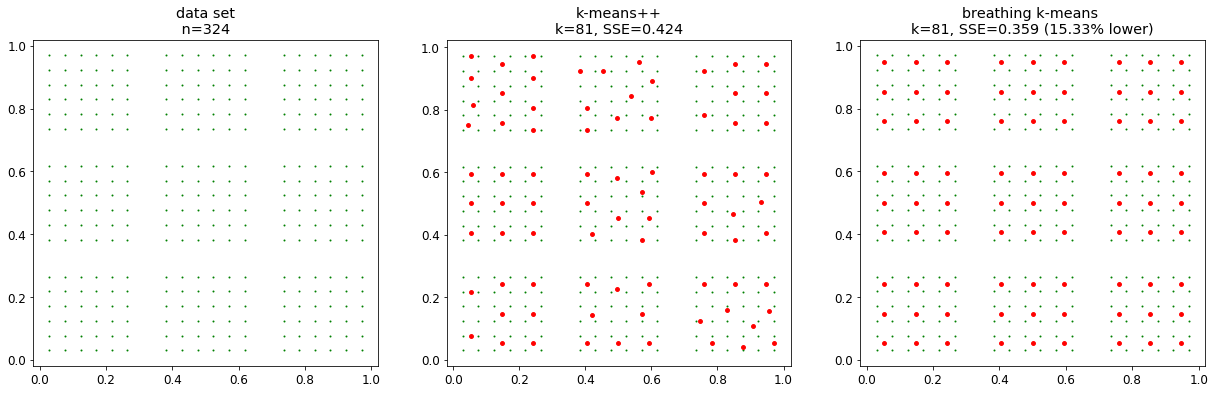

In [16]:
run_on_csv_file("fig5_dat.csv",k=81) 

# Custom data (created on the fly as numpy array)

## 500 random points in the unit square

k-means++ ...            SSE=1.291                 t=  0.25s 
breathing k-means ...    SSE=1.241 ( 3.92% lower)  t=  0.11s (-54.76% overhead)


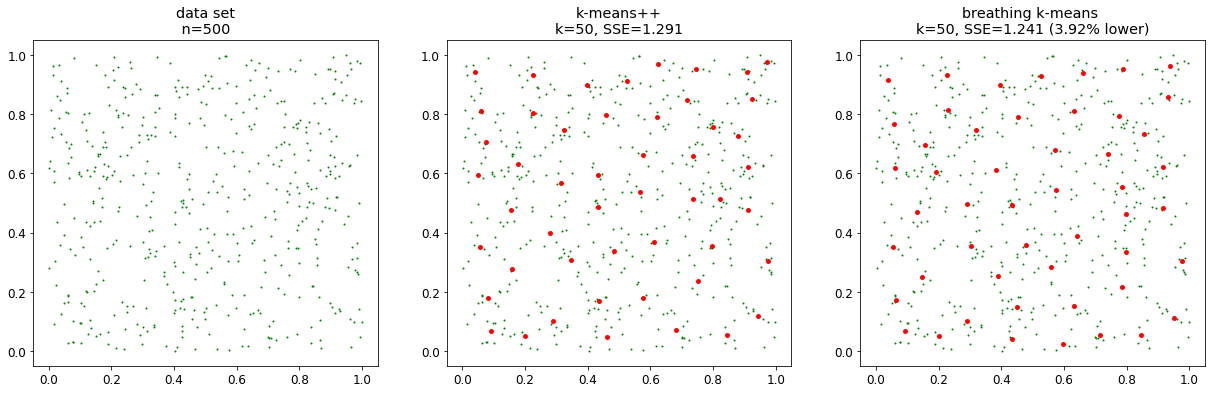

In [17]:
run_on_array(X=np.random.random((500,2)),k=50)

## 3000 random points in the unit square

k-means++ ...            SSE=9.445                 t=  0.78s 
breathing k-means ...    SSE=9.241 ( 2.16% lower)  t=  0.81s ( 3.52% overhead)


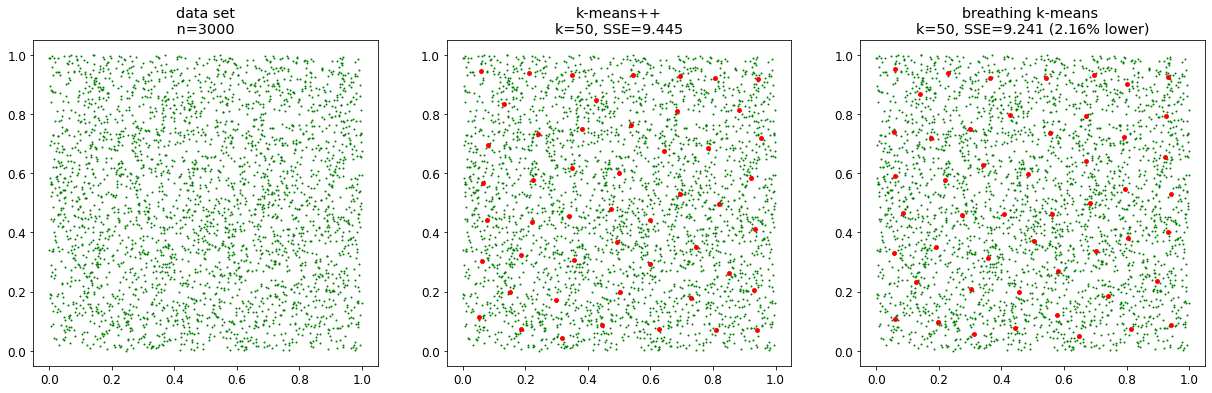

In [18]:
run_on_array(X=np.random.random((3000,2)),k=50)  

## squares of random points randomly distributed in the unit square

k-means++ ...            SSE=0.893                 t=  0.44s 
breathing k-means ...    SSE=0.866 ( 3.00% lower)  t=  0.45s ( 3.57% overhead)


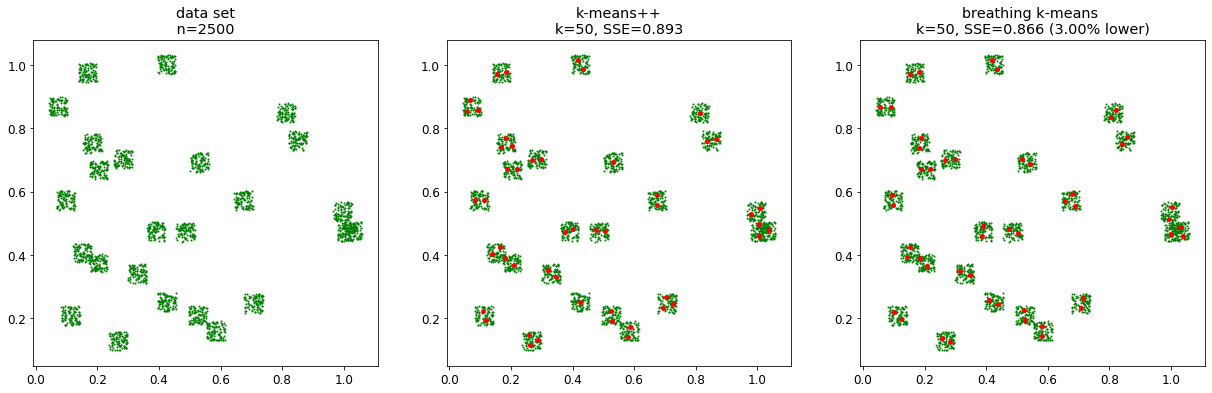

In [19]:
g=25
X=np.concatenate([np.random.random((100,2))*0.06+np.random.random(2) for i in range(g)])
run_on_array(X=X,k=g*2)

## Gaussian clusters randomly distributed in the unit square

k-means++ ...            SSE=10.915                 t=  0.68s 
breathing k-means ...    SSE=10.691 ( 2.06% lower)  t=  0.56s (-18.44% overhead)


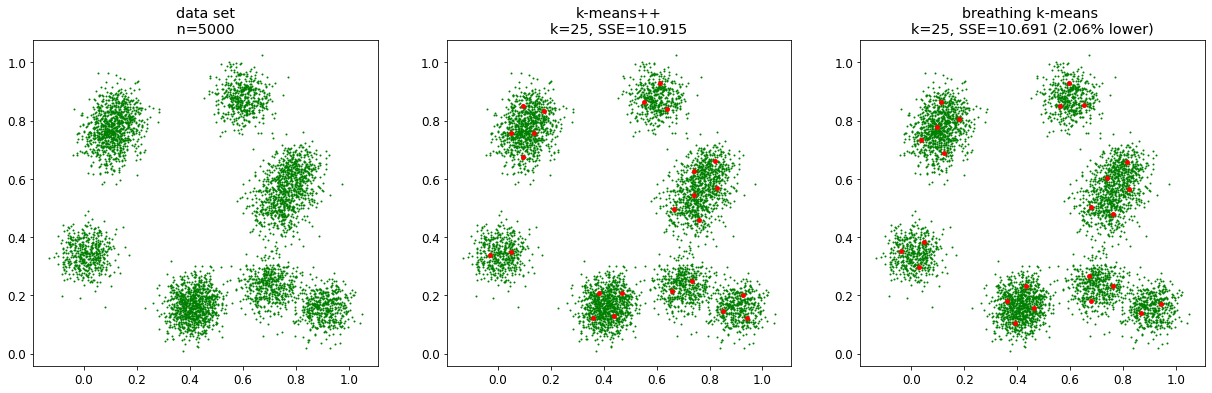

In [20]:
X=np.concatenate([np.random.normal(size=(500,2))*0.05+np.random.random(2) for i in range(10)])
run_on_array(X=X,k=25)

# Data set with known (or suspected) optimum
The data set is constructed from 237 non-overlapping squares of 4x4 points. The assumed optimal solution is obtained by placing one centroid in the center of each square. One should note that this heuristic does not always result in an optimal solution: E.g. if all squares are arranged in a connected larger shape, better solutions then the one obtained by this method exist, which then only is "a" solution of unknown quality.

Optimum:                 SSE=1.519
k-means++ ...            SSE=1.635=Opt+ 7.64%, t=  2.86s 
breathing k-means ...    SSE=1.564=Opt+ 2.96%, t=  4.32s  (51.22% overhead)


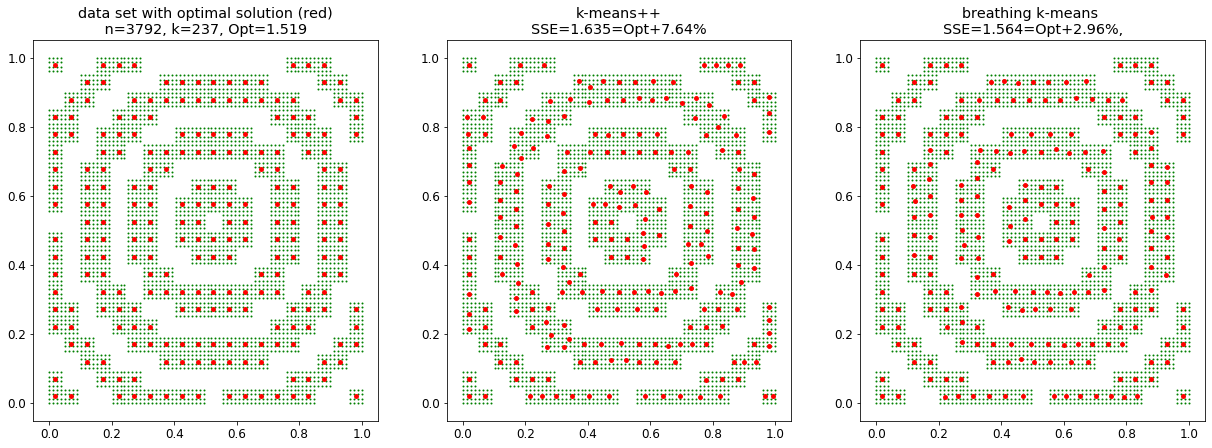

In [21]:
run_on_stored_dataset_with_opt(prefix="circles",dir="../data")

# Arbitrary data set from csv-file (try out any data set here)
(every data point is expected in one line, see example file "mixed.csv")

k-means++ ...            SSE=4.161                 t=  1.59s 
breathing k-means ...    SSE=4.025 ( 3.25% lower)  t=  1.74s ( 9.50% overhead)


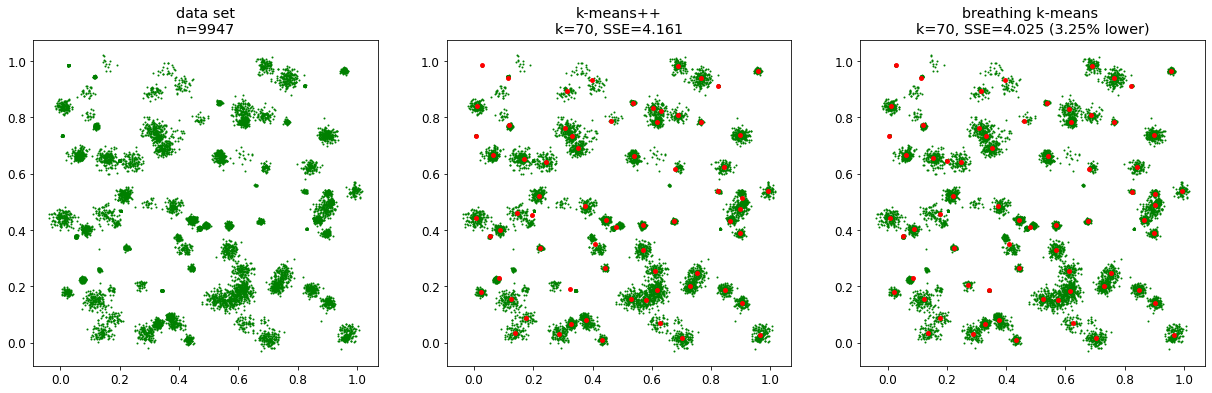

In [22]:
run_on_csv_file(filename="mixed_dat.csv",dir="../data",k=70)